# Assignment_2

# Part 1: SVM

### Use the following function to plot the classification regions

In [3]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [4]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=0 and 25% of the data for testing)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

#### Question 2
1. Train an SVM classifier using linear kernel.
2. Plot the classification regions using the training dataset.

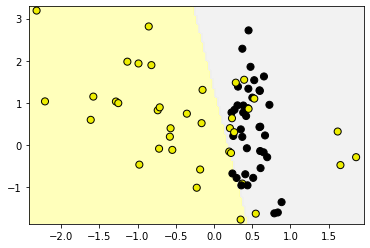

In [8]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train, y_train)
plot_class_regions_for_classifier(clf, X_train, y_train)

#### Question 3
1. Train an SVM classifier using linear kernel with C=0.00001.
2. Train another SVM classifier using linear kernel with C=100
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

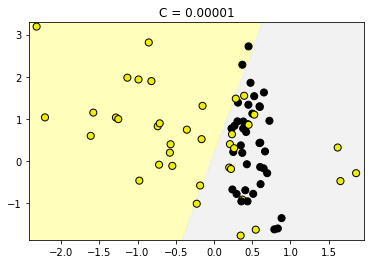

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


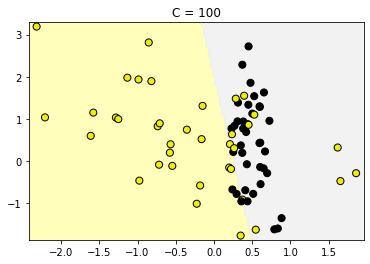

In [16]:
clf1 = LinearSVC(C=0.00001).fit(X_train, y_train)
plot_class_regions_for_classifier(clf1, X_train, y_train, None, None, 'C = 0.00001')
clf2 = LinearSVC(C=100).fit(X_train, y_train)
plot_class_regions_for_classifier(clf2, X_train, y_train, None, None, 'C = 100')

# 4) when C is large(100), More of the black training points are correctly classified after the decision boundary is adjusted.
#While C is small(0.00001), In order to capture the majority of data points correctly with a larger margin, the classifier is more tolerant of these errors.

### Use the fruits dataset in questions 4, 5, 6.

In [63]:
import pandas as pd
fruits = pd.read_table('fruit_data_with_colors.txt')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']

#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=0, and 25% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm

In [64]:
from sklearn.svm import LinearSVC


X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(fruits[['height', 'width']], y_fruits,test_size=0.25,  random_state = 0)

clf = LinearSVC().fit(X_train, y_train)

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### Question 5
For the previous model from question 4. 
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

In [65]:
#1) 4 models have been trained because of 4 classes in label (linear svc one vs rest)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Coefficients:
 [[-0.27569584  0.47559448]
 [-1.10798852  0.78970346]
 [-0.03830329  0.21184245]
 [ 1.01079915 -1.262035  ]]
Intercepts:
 [-1.54211045  0.78672554 -1.66998752  0.37235269]


#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.

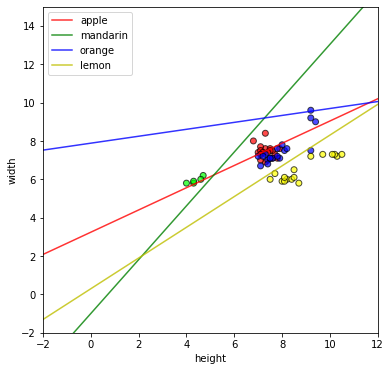

In [67]:
from matplotlib.colors import ListedColormap

target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits[['height']], X_fruits[['width']],
           c=y_fruits, cmap=cmap_fruits, edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)### Use the breast cancer dataset in question 7, 8, and9.

In [52]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 0, and 25% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
grid_search_cv = GridSearchCV(svm.SVC(),parameters ,n_jobs=-1, verbose=1)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   18.3s finished


SVC(C=10)

#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [61]:
clf3=svm.SVC(kernel='rbf',C=10)
clf3.fit(X_train, y_train) 
acc_train = clf3.score(X_train,y_train) * 100
print( 'Training accuracy = ' + str(acc_train))
acc_test = clf3.score(X_test,y_test) * 100
print( 'Testing accuracy = ' + str(acc_test))

Training accuracy = 91.54929577464789
Testing accuracy = 93.7062937062937


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf4=svm.SVC(kernel='rbf',C=10)
clf4.fit(X_train_scaled, y_train) 
acc_train = clf4.score(X_train_scaled,y_train) * 100
print( 'Training accuracy = ' + str(acc_train))
acc_test = clf4.score(X_test_scaled,y_test) * 100
print( 'Testing accuracy = ' + str(acc_test))


Training accuracy = 98.82629107981221
Testing accuracy = 97.2027972027972
